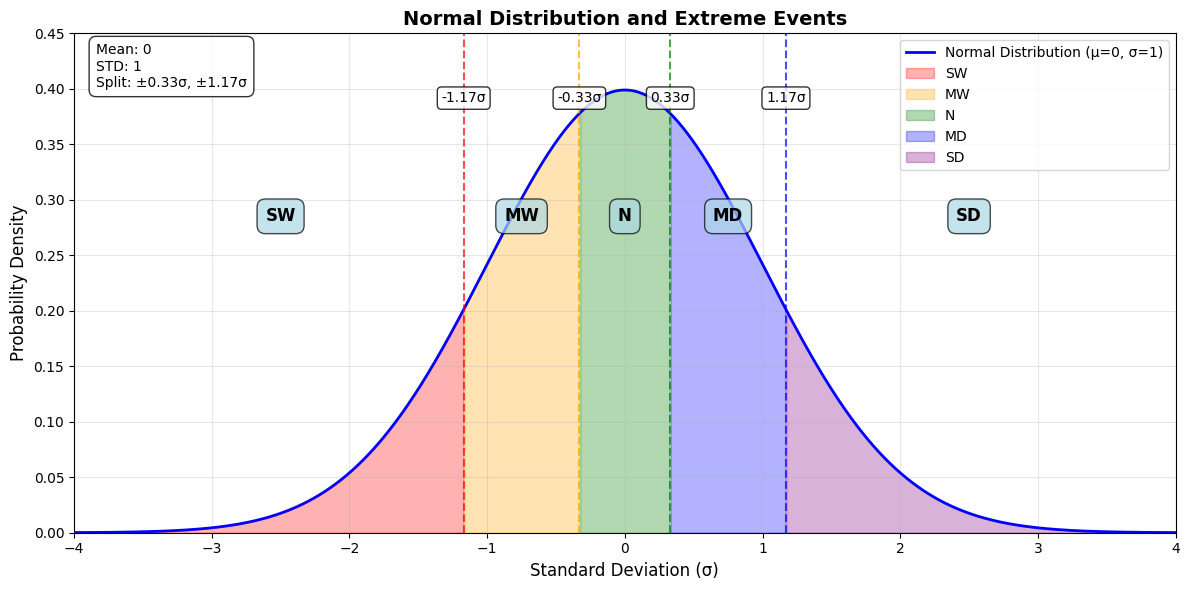

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# 创建图形
fig, ax = plt.subplots(figsize=(12, 6))

# 生成正态分布数据
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # 均值0，标准差1

# 绘制正态分布曲线
ax.plot(x, y, "b-", linewidth=2, label="Normal Distribution (μ=0, σ=1)")

# 定义分割点
split_points = [-1.17, -0.33, 0.33, 1.17]
labels = ["SW", "MW", "N", "MD", "SD"]

# 绘制垂直线并添加标签
colors = ["red", "orange", "green", "blue"]
for i, (point, color) in enumerate(zip(split_points, colors)):
    ax.axvline(x=point, color=color, linestyle="--", alpha=0.7, linewidth=1.5)
    ax.text(
        point,
        ax.get_ylim()[1] * 0.95,
        f"{point:.2f}σ",
        ha="center",
        va="top",
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
    )

# 添加区域标签
x_regions = [-2.5, -0.75, 0, 0.75, 2.5]  # 每个区域的中心位置
for i, (x_pos, label) in enumerate(zip(x_regions, labels)):
    ax.text(
        x_pos,
        ax.get_ylim()[1] * 0.7,
        label,
        ha="center",
        va="top",
        fontsize=12,
        fontweight="bold",
        bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.7),
    )

# 填充区域颜色
ax.fill_between(x, y, where=(x <= -1.17), alpha=0.3, color="red", label="SW")
ax.fill_between(
    x, y, where=((x > -1.17) & (x <= -0.33)), alpha=0.3, color="orange", label="MW"
)
ax.fill_between(
    x, y, where=((x > -0.33) & (x <= 0.33)), alpha=0.3, color="green", label="N"
)
ax.fill_between(
    x, y, where=((x > 0.33) & (x <= 1.17)), alpha=0.3, color="blue", label="MD"
)
ax.fill_between(x, y, where=(x > 1.17), alpha=0.3, color="purple", label="SD")

# 设置图形属性
ax.set_xlabel("Standard Deviation (σ)", fontsize=12)
ax.set_ylabel("Probability Density", fontsize=12)
ax.set_title("Normal Distribution and Extreme Events", fontsize=14, fontweight="bold")
ax.grid(True, alpha=0.3)
ax.set_xlim(-4, 4)
ax.set_ylim(0, 0.45)

# 添加图例
ax.legend(loc="upper right", fontsize=10)

# 添加统计信息
stats_text = f"Mean: 0\nSTD: 1\nSplit: ±0.33σ, ±1.17σ"
ax.text(
    0.02,
    0.98,
    stats_text,
    transform=ax.transAxes,
    fontsize=10,
    verticalalignment="top",
    bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.8),
)

plt.tight_layout()
plt.show();